# IN THE NAME OF GOD

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/hw6 dl/META.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,221.610001,222.380005,218.630005,219.059998,218.827820,13288900
1,2020-01-15,220.610001,221.679993,220.139999,221.149994,220.915604,10036500
2,2020-01-16,222.570007,222.630005,220.389999,221.770004,221.534958,10015300
3,2020-01-17,222.029999,222.289993,220.529999,222.139999,221.904556,15905900
4,2020-01-21,222.160004,222.369995,219.119995,221.440002,221.205307,14275800


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1108,2024-06-10,493.859985,502.660004,493.410004,502.600006,502.600006,11236900
1109,2024-06-11,500.160004,507.600006,498.269989,507.470001,507.470001,9673700
1110,2024-06-12,513.989990,514.010010,504.470001,508.839996,508.839996,11983200
1111,2024-06-13,505.709991,509.359985,501.359985,504.100006,504.100006,7929000
1112,2024-06-14,502.649994,504.859985,501.609985,504.850006,504.850006,715721


In [ ]:
train_ratio = 0.7
data_length = len(data)
train_length = round(train_ratio * data_length)
test_length = data_length - train_length
print(f'data length: {data_length}\ntrain length: {train_length}\ntest length: {test_length}')

data length: 1113
train length: 779
test length: 334


In [ ]:
# we only work on Open column

# getting Open column values
open_data = data.Open.values
# reshaping data
open_data = np.reshape(open_data, (-1, 1))
open_data

array([[221.610001],
       [220.610001],
       [222.570007],
       ...,
       [513.98999 ],
       [505.709991],
       [502.649994]])

In [ ]:
# using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_open_data = scaler.fit_transform(open_data)
scaled_open_data

array([[0.2994763 ],
       [0.29719943],
       [0.30166211],
       ...,
       [0.96518662],
       [0.94633416],
       [0.93936696]])

In [ ]:
# train - test data
x_train = []
y_train = []

step = 50
for i in range(train_length - step):
    # creating a batch with step number of data sample
    x_train.append(scaled_open_data[i: i + step, 0])
    # last data sample
    y_train.append(scaled_open_data[i, 0])

# to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
print(x_train)
x_train.shape

[[0.2994763  0.29719943 0.30166211 ... 0.13565573 0.14829235 0.15673951]
 [0.29719943 0.30166211 0.30043258 ... 0.14829235 0.15673951 0.15521401]
 [0.30166211 0.30043258 0.30072858 ... 0.15673951 0.15521401 0.15510016]
 ...
 [0.04423952 0.06630235 0.06318306 ... 0.22750454 0.21869307 0.19642532]
 [0.06630235 0.06318306 0.07210837 ... 0.21869307 0.19642532 0.20068305]
 [0.06318306 0.07210837 0.06791894 ... 0.19642532 0.20068305 0.19826957]]


(729, 50)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(729, 50, 1)

In [ ]:
y_train = np.reshape(y_train, (-1, 1))
print(y_train)
y_train.shape

[[2.99476300e-01]
 [2.97199433e-01]
 [3.01662106e-01]
 [3.00432579e-01]
 [3.00728584e-01]
 [3.01070100e-01]
 [2.97518192e-01]
 [2.97632042e-01]
 [2.80100174e-01]
 [2.87021833e-01]
 [2.99089235e-01]
 [2.65141143e-01]
 [2.69467176e-01]
 [2.58105631e-01]
 [2.65346052e-01]
 [2.78756798e-01]
 [2.74112003e-01]
 [2.73724940e-01]
 [2.76502720e-01]
 [2.73474482e-01]
 [2.68146623e-01]
 [2.71948986e-01]
 [2.82149341e-01]
 [2.81124757e-01]
 [2.91234051e-01]
 [2.87887054e-01]
 [2.80965361e-01]
 [2.54371571e-01]
 [2.55396155e-01]
 [2.43875213e-01]
 [2.31648449e-01]
 [2.10883400e-01]
 [2.36680306e-01]
 [2.41666650e-01]
 [2.25614731e-01]
 [2.20173022e-01]
 [2.00933503e-01]
 [1.81056464e-01]
 [1.92600161e-01]
 [1.91097422e-01]
 [1.58151154e-01]
 [1.67235866e-01]
 [1.41712207e-01]
 [1.38114752e-01]
 [1.13091974e-01]
 [1.28734038e-01]
 [1.50136607e-01]
 [1.35655734e-01]
 [1.48292352e-01]
 [1.56739508e-01]
 [1.55214011e-01]
 [1.55100161e-01]
 [1.57331482e-01]
 [1.71675750e-01]
 [1.62887041e-01]
 [1.571493

(729, 1)

In [ ]:
# model
from keras import Input
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
model = Sequential()

# input layer
model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
23/23 [==============================] - 13s 108ms/step - loss: 0.0332 - accuracy: 0.0014
Epoch 2/50
23/23 [==============================] - 2s 107ms/step - loss: 0.0088 - accuracy: 0.0014
Epoch 3/50
23/23 [==============================] - 4s 159ms/step - loss: 0.0064 - accuracy: 0.0014
Epoch 4/50
23/23 [==============================] - 3s 125ms/step - loss: 0.0062 - accuracy: 0.0014
Epoch 5/50
23/23 [==============================] - 2s 106ms/step - loss: 0.0053 - accuracy: 0.0014
Epoch 6/50
23/23 [==============================] - 2s 108ms/step - loss: 0.0051 - accuracy: 0.0014
Epoch 7/50
23/23 [==============================] - 2s 107ms/step - loss: 0.0048 - accuracy: 0.0014
Epoch 8/50
23/23 [==============================] - 3s 155ms/step - loss: 0.0045 - accuracy: 0.0014
Epoch 9/50
23/23 [==============================] - 3s 129ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 10/50
23/23 [==============================] - 2s 107ms/step - loss: 0.0035 - accuracy: 0.001

In [ ]:
# prediction
y_pred = model.predict(x_train)
# doing inverse transform
y_pred = scaler.inverse_transform(y_pred)

23/23 [==============================] - 4s 43ms/step


In [ ]:
y_train = scaler.inverse_transform(y_train)

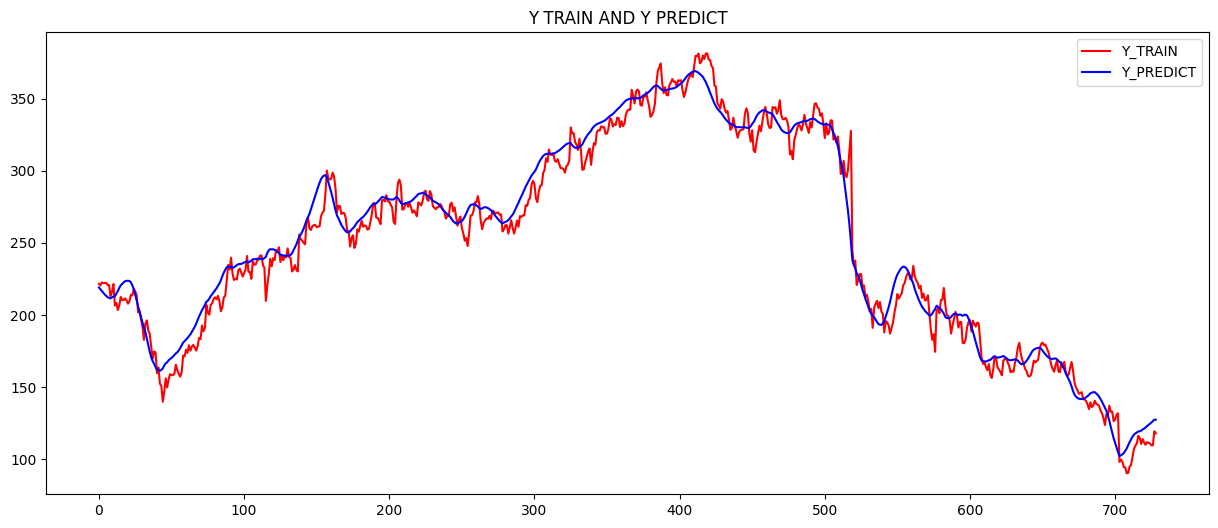

In [ ]:
plt.subplots(figsize=(15, 6))
plt.plot(y_train, color='r', label='Y_TRAIN')
plt.plot(y_pred, color='b', label='Y_PREDICT')
plt.legend()
plt.title('Y TRAIN AND Y PREDICT')
plt.show()

In [ ]:
x_input = data[-50:].Open.values
print(x_input)
x_input.shape

[516.859985 529.280029 522.22998  509.290009 521.109985 517.75
 516.719971 498.109985 503.100006 499.820007 502.799988 489.720001
 491.25     508.059998 421.399994 441.459991 439.559998 431.049988
 428.600006 438.839996 445.929993 455.579987 466.290009 463.5
 470.       477.089996 472.75     463.369995 474.980011 475.
 470.829987 469.950012 467.119995 467.869995 472.880005 467.619995
 476.579987 474.660004 471.670013 465.799988 470.859985 477.
 484.450012 492.980011 495.910004 493.859985 500.160004 513.98999
 505.709991 502.649994]


(50,)

In [ ]:
x_input = x_input.reshape(-1, 1)
x_input.shape

(50, 1)

In [ ]:
scaled_x_input = scaler.fit_transform(x_input)

In [ ]:
scaled_x_input = np.reshape(scaled_x_input, (1, scaled_x_input.shape[0], 1))
scaled_x_input.shape

(1, 50, 1)

In [ ]:
LSTM_prediction_day_2024_06_17 = model.predict(scaled_x_input)
LSTM_prediction_day_2024_06_17

1/1 [==============================] - 0s 36ms/step


array([[0.74113333]], dtype=float32)

In [ ]:
result = scaler.inverse_transform(LSTM_prediction_day_2024_06_17)
result[0, 0]

501.3535

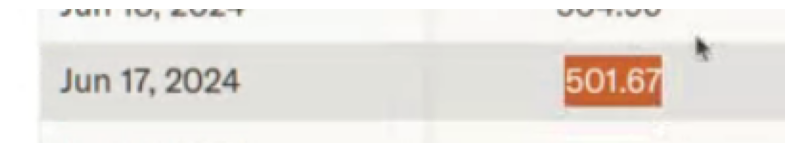

In [ ]:
import cv2
real_result = cv2.imread('/content/drive/MyDrive/hw6 dl/real_result.png')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(real_result)

In [ ]:
# summury
print('Real Result:            501.67')
print('Result Using SimpleRNN: 507.08743')
print(f'Result Using LSTM:      {result[0, 0]}')

Real Result:            501.67
Result Using SimpleRNN: 507.08743
Result Using LSTM:      501.3534851074219


## Real Result:  501.67
## Result Using LSTM:  501.35